# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

Observation #1: There were more male mice used than femail mice used. 
Observation #2: The tumor volume decreased the longer the Capomulin treatment was given. 
Observation #3: With the linear regression line trending upward along with weight, we can conclude that there is a positive correlation between the mouse weight and the volume of the tumor.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os   



# Study data files
mouse_data_to_load = Path = os.path.join("Resources", "Mouse_metadata.csv")
study_data_to_load = Path = os.path.join("Resources", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_data_to_load)
study_results_df = pd.read_csv(study_data_to_load)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how="outer", on="Mouse ID")

# Display the data table for preview
if 'Drug Regimen' in combined_data_df.columns:
    # Count the number of occurrences for each drug regimen
    drug_counts = combined_data_df['Drug Regimen'].value_counts()

    # Display the results
    print(drug_counts)
else:
    print("The CSV file does not contain the 'Drug Regimen' column.")


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64


In [2]:
# Checking the number of mice.
mice_count = combined_data_df["Mouse ID"].nunique()
mice_count


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = combined_data_df[combined_data_df.duplicated]
duplicate_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates(subset=["Mouse ID"], keep = "first")
clean_df






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.0,0
10,a251,Infubinol,Female,21,25,0,45.0,0
20,a262,Placebo,Female,17,29,0,45.0,0
30,a275,Ceftamin,Female,20,28,0,45.0,0
40,a366,Stelasyn,Female,16,29,0,45.0,0
...,...,...,...,...,...,...,...,...
1850,z435,Propriva,Female,12,26,0,45.0,0
1853,z578,Ramicane,Male,11,16,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].nunique()
clean_mice_count


249

## Summary Statistics

In [24]:
# Define regimen_grouped as the groupby object for the 'Drug Regimen' column
regimen_grouped = combined_data_df.groupby('Drug Regimen')

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = regimen_grouped['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    SEM=lambda x: st.sem(x, nan_policy='omit')
).reset_index()


#Rename Columns
summary_statistics = summary_statistics.rename(columns = {
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "variance": "Tumor Volume Variance",
    "std_dev": "Tumor Volume Std. Dev.",
    "SEM": "Tumor Volume Std. Err."
})

summary_statistics_df = summary_statistics.set_index("Drug Regimen")
summary_statistics_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

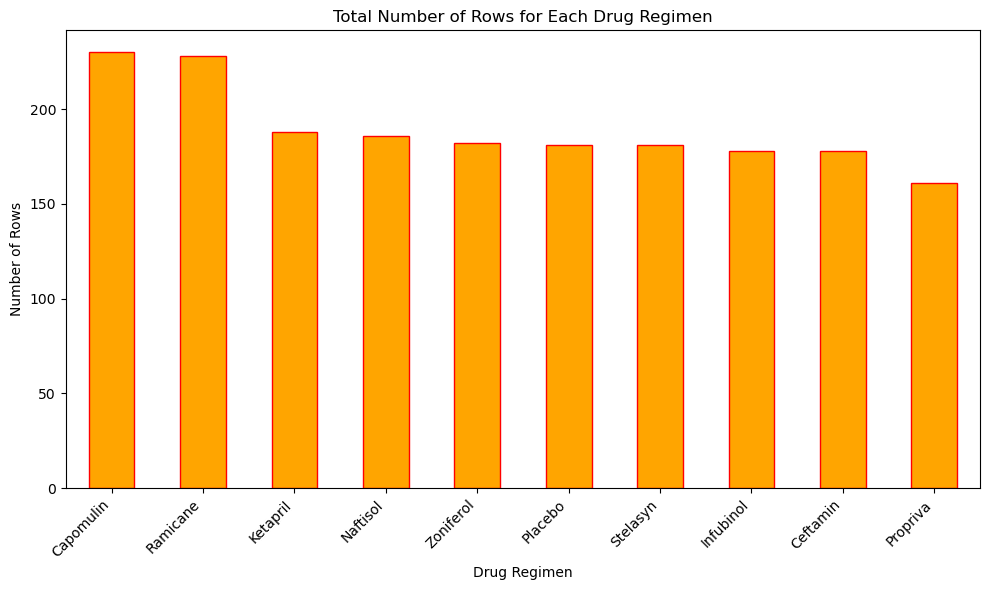

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Make sure data frame contains columns
if 'Drug Regimen' in combined_data_df.columns:
    # Count the number of rows for each drug regimen
    regimen_counts = combined_data_df['Drug Regimen'].value_counts()

    ax = regimen_counts.plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='red')

    ax.set_xlabel('Drug Regimen')
    ax.set_ylabel('Number of Rows')
    ax.set_title('Total Number of Rows for Each Drug Regimen')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("The CSV file does not contain the 'Drug Regimen' column.")



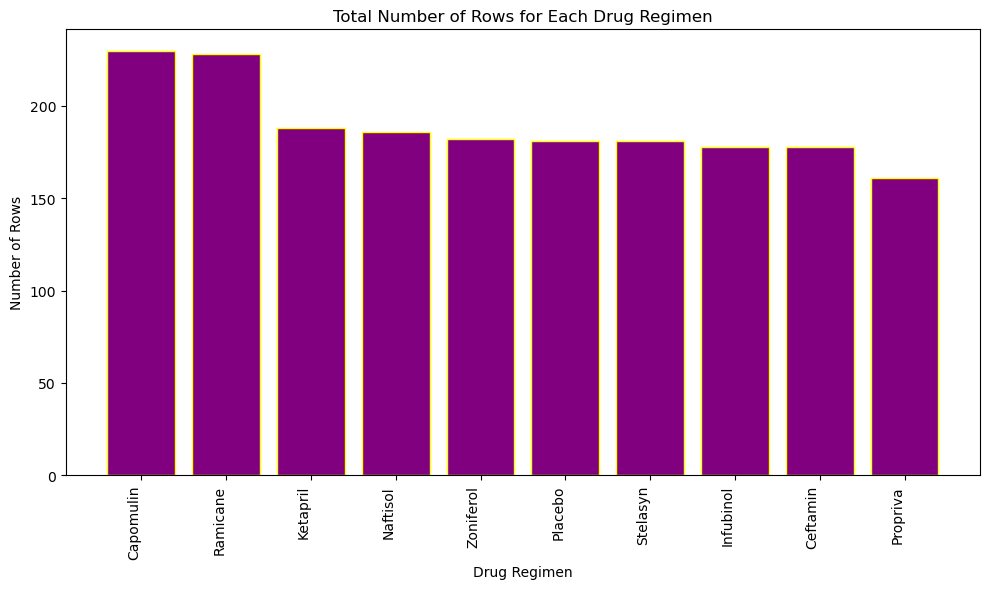

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

if 'Drug Regimen' in combined_data_df.columns:
    
    regimen_counts = combined_data_df['Drug Regimen'].value_counts()

    
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(regimen_counts.index, regimen_counts.values, color='purple', edgecolor='yellow')

    plt.xlabel('Drug Regimen')
    plt.ylabel('Number of Rows')
    plt.title('Total Number of Rows for Each Drug Regimen')

    plt.xticks(rotation=90, ha='right')

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("The CSV file does not contain the 'Drug Regimen' column.")

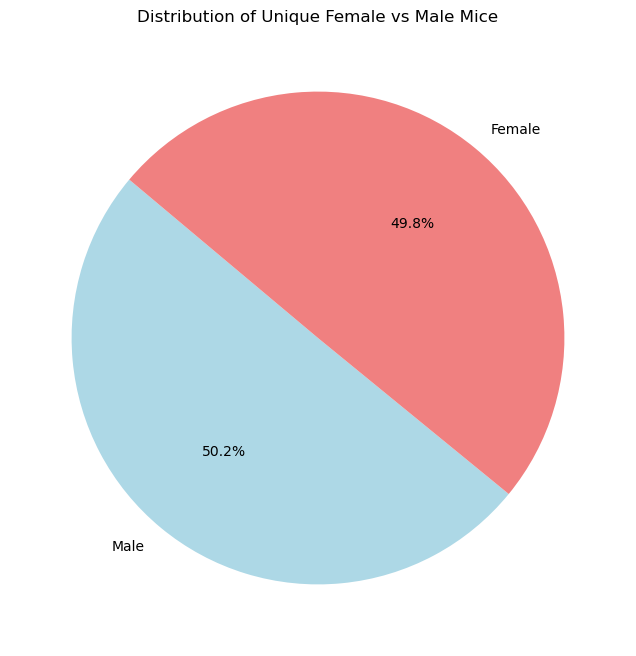

In [67]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Make sure the DataFrame contains the required columns
if 'Mouse ID' in combined_data_df.columns and 'Sex' in combined_data_df.columns:
    
    unique_mice_df = combined_data_df.drop_duplicates(subset='Mouse ID')
    
    sex_counts = unique_mice_df['Sex'].value_counts()
    
    plt.figure(figsize=(8, 8))
    ax = sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
    
    plt.title('Distribution of Unique Female vs Male Mice')
    
    plt.ylabel('')  # Remove the y-label to clean up the plot
    plt.show()
else:
    print("The CSV file does not contain the required columns.")



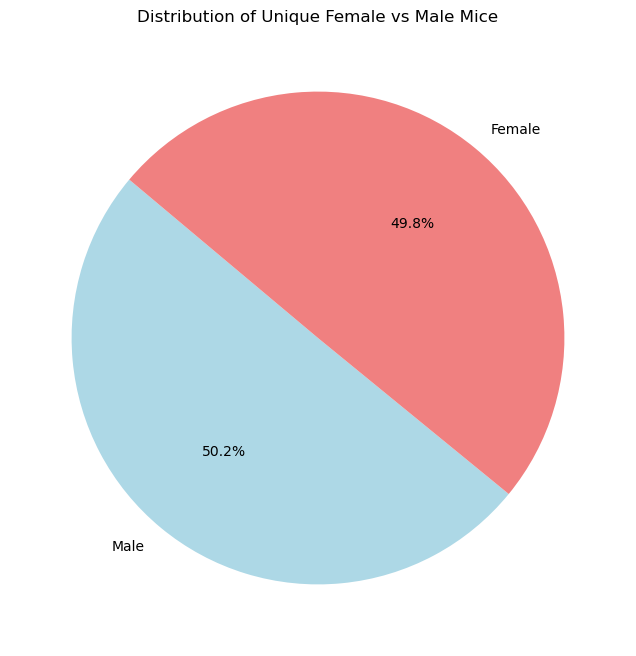

In [68]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Make sure the DataFrame contains the required columns
if 'Mouse ID' in combined_data_df.columns and 'Sex' in combined_data_df.columns:
    
    unique_mice_df = combined_data_df.drop_duplicates(subset='Mouse ID')
    
    sex_counts = unique_mice_df['Sex'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
    
    plt.title('Distribution of Unique Female vs Male Mice')
    
    plt.show()
else:
    print("The CSV file does not contain the required columns.")


## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoint = combined_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, combined_data_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the data to only include the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatments)]

filtered_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
# List of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Dictionary to store outlier data
outlier_dict = {}


for treatment in treatments:
    
    treatment_data = filtered_df[filtered_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    tumor_volumes.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}")





Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


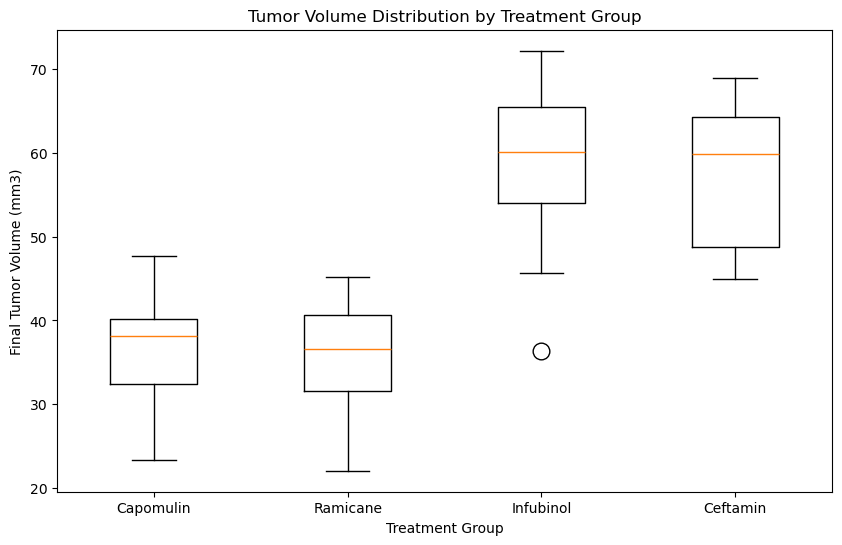

In [88]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_volumes, labels= treatments, flierprops={'marker': 'o', 'color': 'red', 'markersize': 12})

ax.set_title('Tumor Volume Distribution by Treatment Group')
ax.set_xlabel('Treatment Group')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

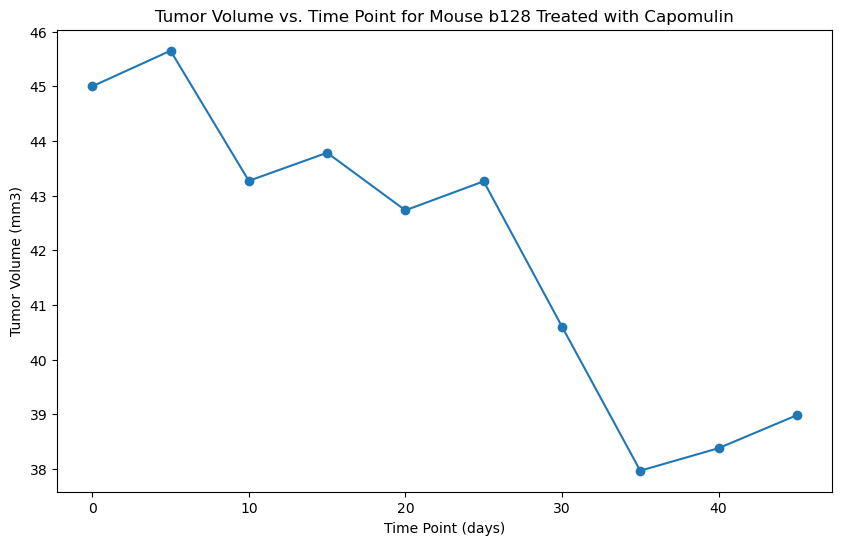

In [100]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = combined_data_df[combined_data_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin
single_mouse_id = capomulin_data['Mouse ID'].iloc[0]
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == single_mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

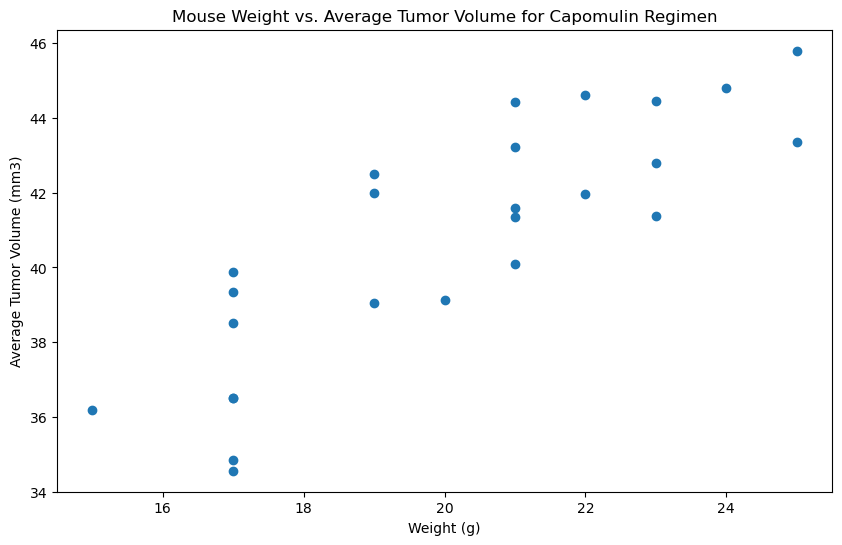

In [101]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weight_avg_tumor = pd.merge(avg_tumor_volume, mouse_metadata_df[['Mouse ID', 'Weight (g)']], on='Mouse ID')

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight_avg_tumor['Weight (g)'], mouse_weight_avg_tumor['Tumor Volume (mm3)'])

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation coefficient: 0.841936342469472


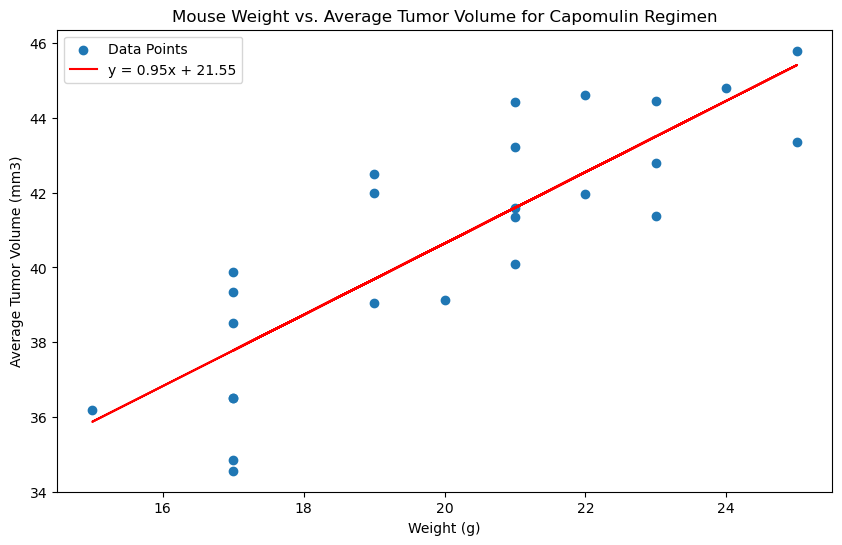

R-squared: 0.7088568047708723


In [102]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weight_avg_tumor = pd.merge(avg_tumor_volume, mouse_metadata_df[['Mouse ID', 'Weight (g)']], on='Mouse ID')

correlation = st.pearsonr(mouse_weight_avg_tumor['Weight (g)'], mouse_weight_avg_tumor['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation[0]}")

# Regression analysis
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight_avg_tumor['Weight (g)'], mouse_weight_avg_tumor['Tumor Volume (mm3)'])

regress_values = mouse_weight_avg_tumor['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight_avg_tumor['Weight (g)'], mouse_weight_avg_tumor['Tumor Volume (mm3)'], label='Data Points')
plt.plot(mouse_weight_avg_tumor['Weight (g)'], regress_values, color='red', label=line_eq)

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()

print(f"R-squared: {r_value**2}")
